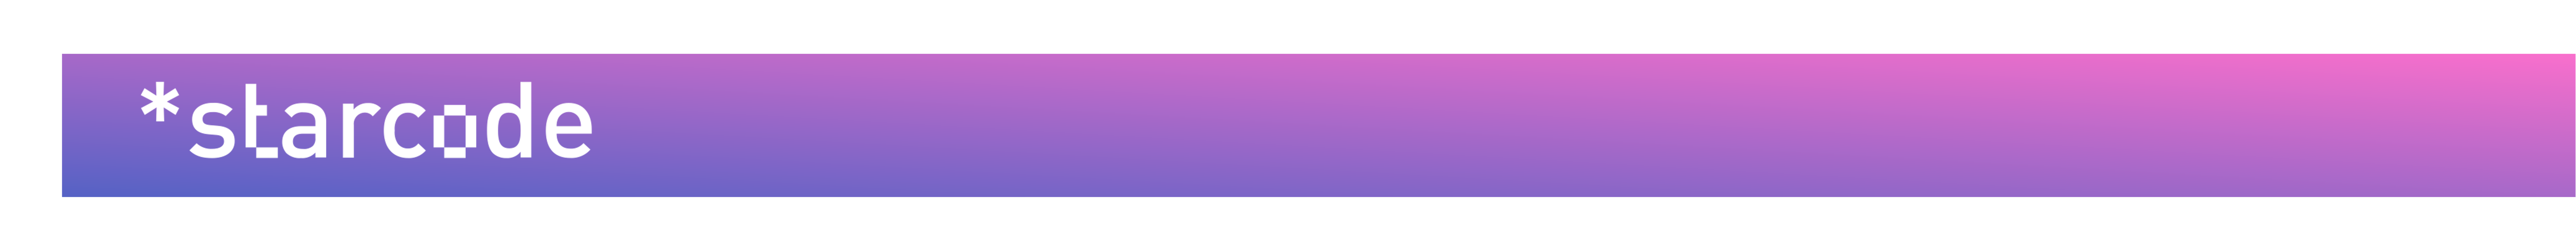

# **<span style="color: #6162C5;"> Bildbearbeitung mit Python</span>**
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/starcodecourses/Python-Bildbearbeitung/blob/main/bildbearbeitungskurs.ipynb) &thinsp; [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/starcodecourses/Python-Bildbearbeitung/main?labpath=bildbearbeitungskurs.ipynb)

Heute werden wir mit Python und Künstlicher Intelligenz Bilder bearbeiten! Dafür werden wir Python verwenden. Python ist eine beliebte Programmiersprache. Man benutzt sie um **Code** zu schreiben, das heißt dem Computer Befehle zu geben.

Das kann man zum Beispiel in Notebooks wie diesem hier machen.
Die grau gefärbten Zeilen sind **Code-Blöcke**.
Diese kannst du ausführen, das heißt, der Computer macht, was du im Code beschreibst.

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Führe diesen Code-Block aus in dem du auf den Playbutton klickst.*

In [ ]:
print("Hello World!")

Hello World!


print() ist ein sogenannter **Befehl**. Es gibt viele verschiedene Befehle, die
dem Computer sagen was er machen soll. Der print()-Befehl sagt, er soll den Inhalt der Klammern ausgeben.

In dem du den Inhalt in den Klammern veränderst, kannst du dir auch andere Sachen ausgeben lassen.

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Verändere das "Du" in den Klammern zu deinem Namen!*

In [ ]:
print("Hallo Du")

Hallo Du


### <span style="color: #C26BCA;"> Variablen </span>

**Variablen** sind wie Boxen, in die man Dinge reinlegt. Jede Box hat einen Namen und einen Inhalt.

\<Name der Box> = \<Inhalt der Box>

Zum Beispiel:

In [ ]:
meine_lieblingszahl = 7

Der Computer speichert jetzt die 7 in der Variable mit dem Namen "meine_lieblingszahl".

Jetzt kannst du dir den Inhalt dieser Variable einfach ausgeben lassen, indem du den Namen der Variable in die Klammern des print()-Befehls schreibst!

In [ ]:
print(meine_lieblingszahl)

7


Du kannst einen Computer wie einen großen Taschenrechner benutzen. Zum Beispiel kannst du mit der Variable von oben rechnen.


**<span style="color: #EB6ECB;">Aufgabe:</span>** *Führe diesen Code-Block aus und ändere die Zahl, um zu sehen, wie sich das Ergebnis verändert!*

In [ ]:
meine_lieblingszahl + 3

10

*Definiere eine Variable mit dem Namen "jahr" und befülle sie mit der Zahl 2023.*

\<Name der Variable> = \<Inhalt der Variable>

## <span style="color: #9C68C8;"> Künstliche Intelligenz (KI) </span>

Künstliche Intelligenz (KI) ist ein Computer Programm, das Aufgaben selbstständig lösen kann. Eine KI kann zum Beispiel lernen, Schach zu spielen.

In "normalen" Programmen gibt der Mensch im Code den Lösungsweg vor.
Einer KI gibt der Mensch ein Problem vor. Die Schach KI lernt, selbstständig zu entscheiden, wie sie auf die Schachzüge des Gegenspielers reagieren muss.

Um zu lernen braucht die KI Daten. eine Schach KI braucht Daten über die vorherigen Schach Spiele: welche Züge hat der Gegner gemacht, welche Züge hat die KI gemacht, und wie ist das Spiel ausgegangen.

## <span style="color: #9C68C8;"> Bilder bearbeiten </span>

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Führe den nächsten Code-Block aus!*



In [ ]:
#@title Befehle { display-mode: "form" }
# loading libraries
from skimage import segmentation, color, io
from skimage.future import graph
from skimage.transform import rescale, resize
from skimage.segmentation import mark_boundaries
from skimage.filters import sobel
from sklearn.cluster import KMeans
from skimage.future import graph
from matplotlib import pyplot as plt
from io import BytesIO
from PIL import Image
from ipywidgets import FileUpload
from IPython.display import display
from collections import Counter
from functools import reduce
import numpy as np
import urllib.request

# segmentation params
compactness = 10
segment_count = 2000
sigma = 3
theshold = 10
border_color = np.array([50, 50, 50])

def foto_hochladen(number):
  if number == 1:
    urllib.request.urlretrieve("https://img.freepik.com/fotos-premium/luftbild-ueber-berlin-in-deutschland-auf-einem-sonnenuntergang_87646-4849.jpg","image.jpg")
  if number == 2:
    urllib.request.urlretrieve("https://wallpapers.com/images/hd/artwork-of-frida-kahlo-representing-a-mexican-woman-ynl9bzx20d4bgx50.jpg","image.jpg")
  if number == 3:
    urllib.request.urlretrieve("https://i.pinimg.com/564x/77/34/fa/7734fa75249ff031476fd18b93249d6f.jpg","image.jpg")
  if number == 4:
    urllib.request.urlretrieve("https://i.pinimg.com/564x/6e/96/87/6e96879ee85f507c1b2d274ac1289d50.jpg","image.jpg")
  if number == 5:
    urllib.request.urlretrieve("https://64.media.tumblr.com/43f7e479ea57be4fc1bfdb5e133390ff/tumblr_p25sdpqVun1un8qsqo6_1280.jpg","image.jpg")
  img = Image.open('/content/image.jpg')
  array = np.asarray(img)
  plt.imshow(array)
  return array

def foto_speichern(upload):
  # convert uploaded byte image into array
  byte_image = list(upload.value.values())[0]['content']
  image = np.array(Image.open(BytesIO(byte_image)))
  plt.imshow(image)
  return image

def pixel_gruppieren(image):
  # segment image
  slic_labels = segmentation.slic(image, compactness=compactness,
                            n_segments=segment_count,
                            start_label=1,
                            sigma=sigma)

  slic_img = color.label2rgb(slic_labels, image, kind='avg', bg_label=0).astype(int)
  #plt.imshow(slic_img)

  # construct RAG from segmented image
  g = graph.rag_mean_color(image, slic_labels)

  # RAG regions that are similar will be merged
  rag_labels = graph.cut_threshold(slic_labels, g, theshold)

  # show image with grouped colors
  rag_img = color.label2rgb(rag_labels, image, kind='avg', bg_label=-1).astype(int)
  plt.imshow(rag_img)

  return rag_img

def kmeans(rag_img,color_count):
  # kmeans for color reduction
  arr = rag_img.reshape((-1, 3))
  kmeans = KMeans(n_clusters=color_count,n_init='auto').fit(arr)
  kmean_labels = kmeans.labels_
  centers = kmeans.cluster_centers_
  kmeans_img = centers[kmean_labels].reshape(rag_img.shape).astype('uint8')

  plt.figure(figsize=(10, 10))
  plt.subplot(2,1,1)
  plt.imshow(kmeans_img)

  plt.imsave(f'goal.png', kmeans_img)

  # show color palette
  plt.subplot(2,1,2)
  plt.title(f'Die {color_count} häufigsten Farben im Bild')
  plt.imshow([centers.astype('int')])
  plt.axis('off')

  return kmeans_img

def umrisse_zeichnen(image,kmeans_img):
  white_image = np.ones_like(image)*255
  gray_kmeans = color.rgb2gray(kmeans_img)
  min = np.min(gray_kmeans)
  max = np.max(gray_kmeans)
  normalized_grayscale_img = ((gray_kmeans - min)*(255/(max-min))).astype('int')
  kmeans_borders = mark_boundaries(white_image, normalized_grayscale_img, border_color/255)
  plt.imshow(kmeans_borders)
  plt.imsave(f'canvas.png', np.clip((kmeans_borders+0.6), 0, 1))

Bild 1:

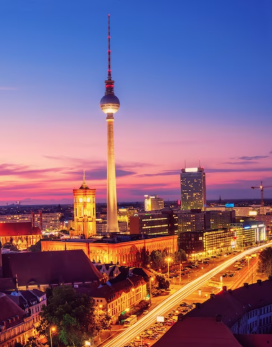

Bild 2:

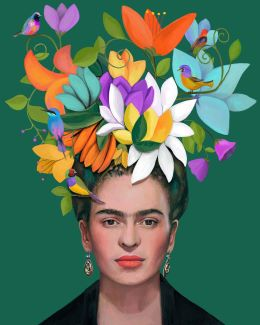

Bild 3:

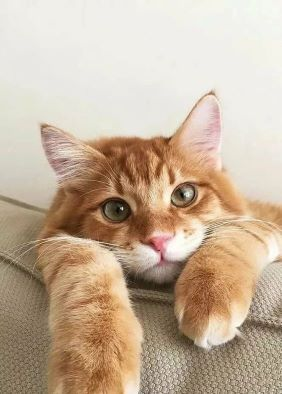

Bild 4:

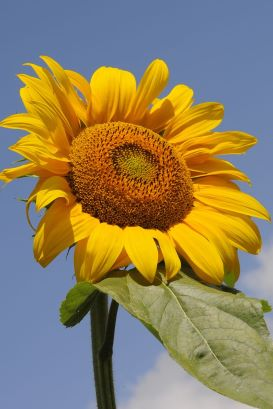

Bild 5:

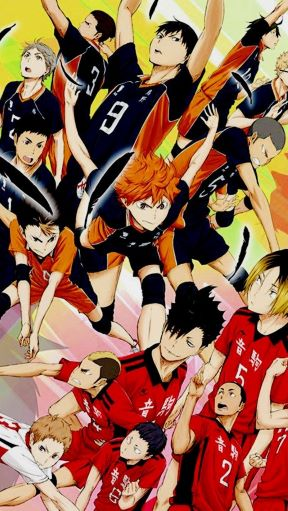

Manche Befehle geben Sachen zurück. Die kannst du in Variablen speichern, um sie später noch einmal zu benutzen.

Der Befehl foto_hochladen() gibt das Bild zurück, das du speichern möchtest.

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Such dir eines der Bilder aus und schreibe die Nummer in die Klammern.*

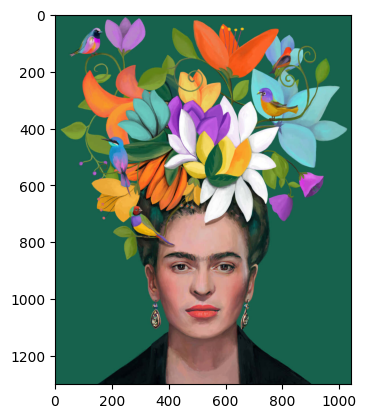

In [ ]:
foto = foto_hochladen(2)

*Oder lade hier ein Foto hoch und führe die nächsten beiden Code-Blöcke aus!*

In [ ]:
upload = FileUpload(accept='image/*', multiple=True)
print("Bitte lade hier ein Foto hoch")
display(upload)

Bitte lade hier ein Foto hoch


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

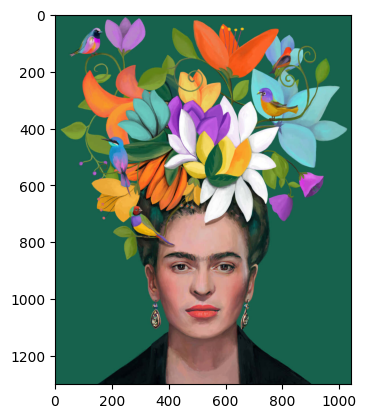

In [ ]:
foto = foto_speichern(upload)

### <span style="color: #C26BCA;"> Pixel </span>

Computer Bildschirme und die Bilder, die sie zeigen, bestehen aus Pixeln. Pixel sind kleine farbige Bildpunkte, die in Zeilen und Spalten angeordnet sind.

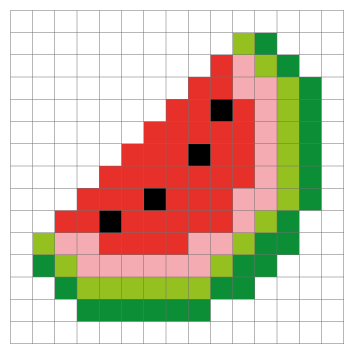

## <span style="color: #9C68C8;"> Gruppieren (Clustern) </span>

Gruppieren bedeutet etwas in Gruppen mit **ähnlichen Eigenschaften** zusammenzufassen.
Das nennt mant auf Englisch "**Clustern**".




Clustern ist eine wichtige Technik in der Künstlichen Intelligenz, bei der der Computer selbstständig herausfindet, welche Elemente in einer Gruppe zusammengefasst werden können.

### <span style="color: #C26BCA;"> Pixel gruppieren </span>

Wir können die Pixel in unserem Bild clustern. Dabei fassen wir Pixel, die eine ähnliche Farbe haben und nebeneinander liegen, in Gruppen zusammen.


**<span style="color: #EB6ECB;">Aufgabe:</span>** *Lege eine Variable an und nenne sie "gruppiert".*

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Rufe den Befehl **pixel_gruppieren()** auf. Gib dem Befehl in den Klammern die Variable **foto**.*

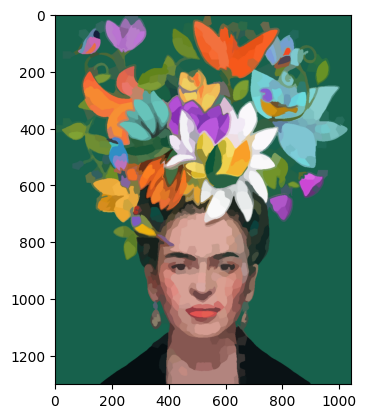

In [ ]:
foto_gruppiert = pixel_gruppieren(foto)

Was fällt dir an diesem bearbeitetem Foto im Gegensatz zum Original auf?

### <span style="color: #C26BCA;"> Farben clustern </span>

In unserem letzten Bild gibt es noch sehr viele verschiedene Farben. Die müsstest du alle anmischen, um das Bild zu malen. In dem wir die Farben clustern, könne wir deren Anzahl zu reduzieren.

### <span style="color: #C26BCA;"> K-means </span>

K-means ist ein Algorithmus, der herausfindet, welche Datenpunkte in eine Guppe gehören.
Man kann festlegen, in wie viele Gruppen die Daten eingeteilt werden soll.

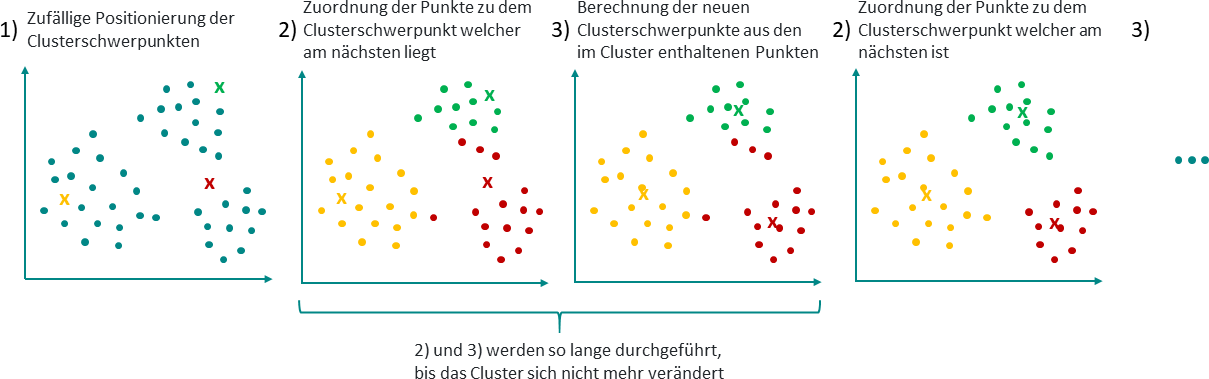

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Rufe den Befehl **kmeans()** auf, und gib ihm in den Klammern das gruppierte Foto und die Zahl 10.*

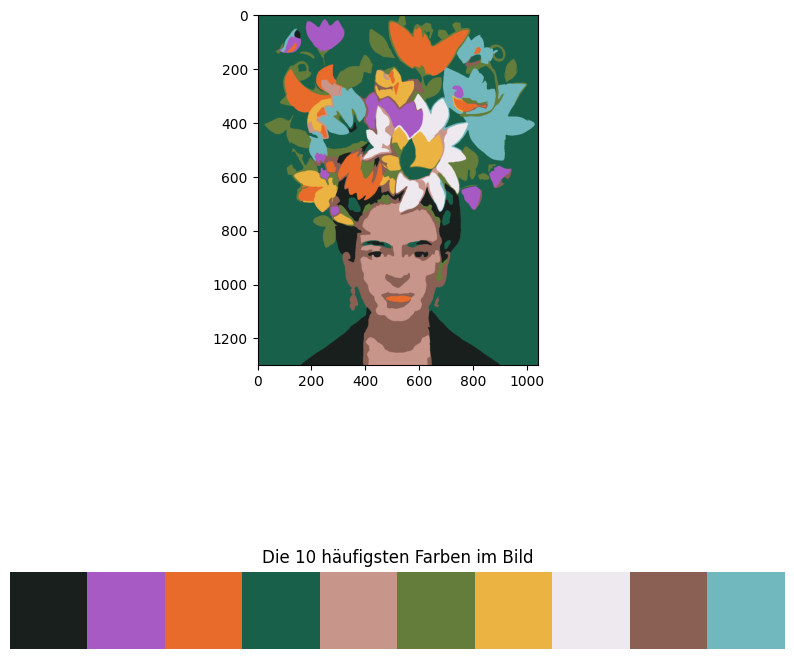

In [ ]:
kmeans_foto = kmeans(foto_gruppiert,10)

## <span style="color: #9C68C8;"> Umrisse zeichen </span>

Jetzt kommt der letzte Schritt! Wir müssen nur noch die Umrisse der Farbgruppen zeichnen.

**<span style="color: #EB6ECB;">Aufgabe:</span>** *Rufe den Befehl umrisse_zeichnen() auf. In den Klammern musst du dem Befehl das Original Foto und das mit K-means geclusterte Foto übergeben.*

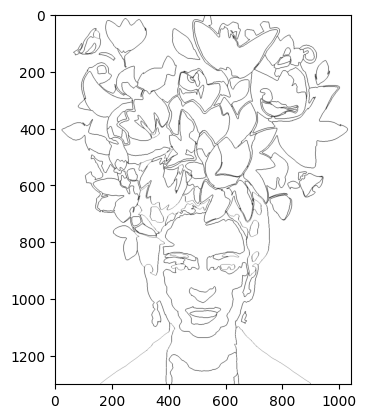

In [ ]:
umrisse_zeichnen(foto,kmeans_foto)

Fertig ist dein Malen-Nach-Zahlen Bild!

Du kannst dein fertiges Bild in der Leiste auf der linken Seite runterladen!

Klicke dafür links auf das Ordner Symbol:

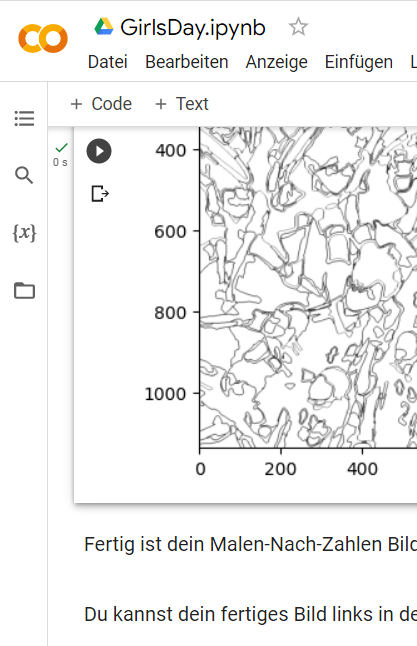

Dort siehst du dann die Fotos! Canvas.png ist die schwarz-weiße Vorlage zum Ausdrucken und goal.png ist das kmeans Foto auf dem du die Farben für die Felder siehst.

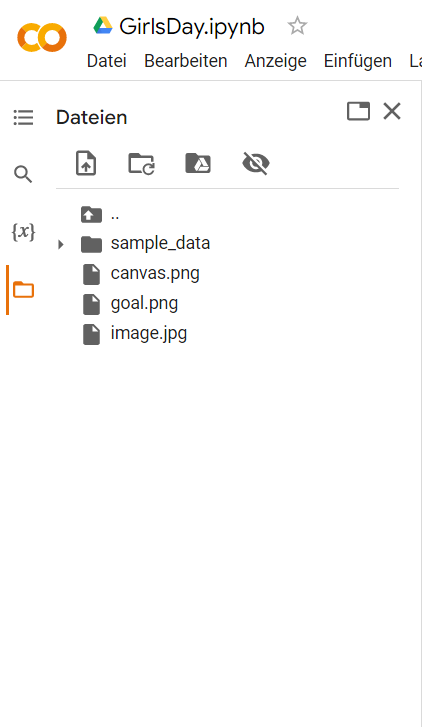

Wir würden uns freuen, wenn wir dich bald in einem unserer Kurse bei *starcode wiedersehen!

Deshalb laden wir dich zu unserem nächsten Kurs, am Samstag, den 3. Juni 2023, ein! Wir geben einen Python Kurs für Anfängerinnen, an dem du gerne teilnehmen kannst. Dort werden wir an das anknüpfen, was wir am Girls Day gelernt haben. Wir werden in diesem Kurs mehr Zeit haben und Python ausführlicher kennenlernen.

Du kannst dich hier anmelden: https://www.eventbrite.com/e/python-fur-anfangerinnen-tickets-631635427567

## <span style="color: #9C68C8;"> Hier kannst du mehr Programmieren und über Informatik lernen! </span>

*   In den Kursen von *starcode: https://www.starcode.de/
*   Spiel Code Combat https://codecombat.com/play/dungeon
*   Code it https://code-it-studio.de/
*   Code.org https://studio.code.org/courses
*   Clustering erklärt: https://datatab.de/tutorial/k-means-clusteranalyse

